In [5]:
!conda install keras_preprocessing

Retrieving notices: ...working... done
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - keras_preprocessing

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/images/train'
TEST_DIR = 'images/images/validation'

In [4]:
#traverse through each folder and get path, label and return 
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

In [6]:
print(train)

                                       image     label
0            images/images/train\angry\0.jpg     angry
1            images/images/train\angry\1.jpg     angry
2           images/images/train\angry\10.jpg     angry
3        images/images/train\angry\10002.jpg     angry
4        images/images/train\angry\10016.jpg     angry
...                                      ...       ...
28816  images/images/train\surprise\9969.jpg  surprise
28817  images/images/train\surprise\9985.jpg  surprise
28818  images/images/train\surprise\9990.jpg  surprise
28819  images/images/train\surprise\9992.jpg  surprise
28820  images/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

In [8]:
print(test)

                                           image     label
0       images/images/validation\angry\10052.jpg     angry
1       images/images/validation\angry\10065.jpg     angry
2       images/images/validation\angry\10079.jpg     angry
3       images/images/validation\angry\10095.jpg     angry
4       images/images/validation\angry\10121.jpg     angry
...                                          ...       ...
7061  images/images/validation\surprise\9806.jpg  surprise
7062  images/images/validation\surprise\9830.jpg  surprise
7063  images/images/validation\surprise\9853.jpg  surprise
7064  images/images/validation\surprise\9878.jpg  surprise
7065   images/images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [9]:
from tqdm.notebook import tqdm

In [20]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [21]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [22]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [23]:
x_train = train_features/255.0
x_test = test_features/255.0

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [26]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [27]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [22]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100


226/226 [==============================] - 240s 1s/step - loss: 1.8221 - accuracy: 0.2438 - val_loss: 1.8054 - val_accuracy: 0.2590
Epoch 2/100
226/226 [==============================] - 235s 1s/step - loss: 1.7831 - accuracy: 0.2590 - val_loss: 1.7240 - val_accuracy: 0.2966
Epoch 3/100
226/226 [==============================] - 234s 1s/step - loss: 1.6781 - accuracy: 0.3248 - val_loss: 1.5208 - val_accuracy: 0.4135
Epoch 4/100
226/226 [==============================] - 233s 1s/step - loss: 1.5534 - accuracy: 0.3910 - val_loss: 1.4227 - val_accuracy: 0.4564
Epoch 5/100
226/226 [==============================] - 233s 1s/step - loss: 1.4826 - accuracy: 0.4246 - val_loss: 1.3570 - val_accuracy: 0.4868
Epoch 6/100
226/226 [==============================] - 234s 1s/step - loss: 1.4288 - accuracy: 0.4502 - val_loss: 1.3057 - val_accuracy: 0.4977
Epoch 7/100
226/226 [==============================] - 234s 1s/step - loss: 1.3933 - accuracy: 0.4620 - val_loss: 1.2979 - val_accurac

In [23]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\Uzair\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from keras.models import model_from_json

In [27]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [28]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
def extract_feature_single_img(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

Actual Label is sad
1/1 [==============================] - 0s 61ms/step
Model's predicted label is  sad


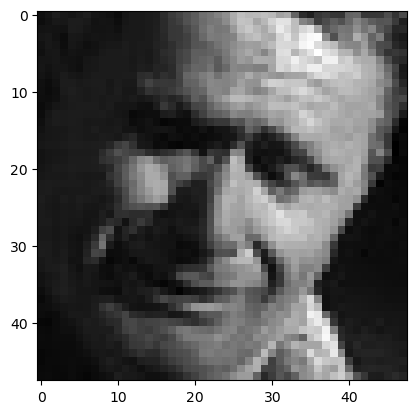

In [39]:
image = 'images/train/sad/321.jpg'
print("Actual Label is sad")
img = extract_feature_single_img(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model's predicted label is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Actual Label is Fear
1/1 [==============================] - 0s 57ms/step
model prediction is  fear


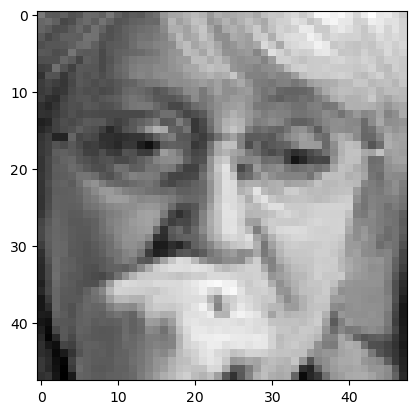

In [53]:
image = 'images/train/fear/173.jpg'
print("Actual Label is Fear")
img = extract_feature_single_img(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')